# 问题积累


### response.text()与resopnse.content()的区别

## requests库使用代理

#### Get方法——以百度为例

200
<!DOCTYPE html><!--STATUS OK-->


    <html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><title>百度一下，你就知道</title><style index="newi" type="text/c
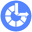

In [5]:
import requests

headers = {
    'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36'
}

r = requests.get('https://www.baidu.com', headers=headers)
print(r.status_code)
print(r.text)

#### Post方法——以为例

In [26]:
import requests

headers = {
    'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36'
}

data = {
    "info":"biu~~~ send post request"
}


r = requests.post('https://dev.kdlapi.com/testproxy', headers=headers, data=data)

print(r.status_code)
print(r.text)

200
post sucess! client ip: 111.38.164.27
post data: info=biu~~~+send+post+request


#### 使用代理

In [7]:
import requests

headers = {
    'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36'
}

data = {
    "info":"biu~~~ send post request"
}

proxies = {
    "http":"http://202.55.5.209:8090/",
    "https":"https://202.55.5.209:8090/"
}

print("这一步")

r = requests.post('https://www.baidu.com/s?ie=UTF-8&wd=ip', headers=headers, proxies=proxies)

print("这二步")

print(r.status_code)
print(r.text)

这一步


SSLError: HTTPSConnectionPool(host='www.baidu.com', port=443): Max retries exceeded with url: /s?ie=UTF-8&wd=ip (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1131)')))

#### 报错积累


`HTTPSConnectionPool(host='dev.kdlapi.com', port=443): Max retries exceeded with url: /testproxy (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1131)')))`

In [24]:
### 注意示例的用法

proxy = '61.183.87.194:8090'
proxies = {
    "http":"http://{}/".format(proxy),
    "https":"http://%(proxy)s/" %{'proxy':proxy}
}
print(proxies)

{'http': 'http://61.183.87.194:8090/', 'https': 'http://61.183.87.194:8090/'}


## Selenium➕chorme使用代理

#### 代码样例

<html><head><script async="" src="https://passport.baidu.com/passApi/js/wrapper.js?cdnversion=1651755265545&amp;_=1651755264905"></script><script type="text/javascript" charset="utf-8" src="https://dss0.bdstatic.com/5aV1bjqh_Q23odCf/static/superman/js/super_load-eb15f1e5a8.js"></script><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon"><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索"><link rel="icon" sizes="any" mask="" href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"><link rel="dns-prefetch" href="//dss1.bdstatic.com"><link rel="dns-prefetch" 
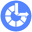

In [8]:
from selenium import webdriver

chrome = webdriver.Chrome()
chrome.get('https://www.baidu.com')
print(chrome.page_source)       # 重要
chrome.quit()     # 退出

#### 使用代理——成功运行

In [30]:
import time
from selenium import webdriver

#设置代理
chrome_options = webdriver.ChromeOptions()
proxy = '202.55.5.209:8090'
chrome_options.add_argument('--proxy-server=%s' % proxy)

chrome = webdriver.Chrome(options = chrome_options)
chrome.get("https://www.baidu.com/s?ie=UTF-8&wd=ip")
time.sleep(10)
print(chrome.page_source)
# chrome.quit()

WebDriverException: Message: unknown error: net::ERR_CONNECTION_RESET
  (Session info: chrome=101.0.4951.54)


## urllib使用代理

In [31]:
import urllib.request
from urllib.parse import urlencode

opener = urllib.request.build_opener()

req = urllib.request.Request('https://www.baidu.com/')
res = opener.open(req)

print(res.status)
print(res.read().decode('utf-8'))

200
<html>
<head>
	<script>
		location.replace(location.href.replace("https://","http://"));
	</script>
</head>
<body>
	<noscript><meta http-equiv="refresh" content="0;url=http://www.baidu.com/"></noscript>
</body>
</html>


In [35]:
import urllib.request
from urllib.parse import urlencode

headers = {
    'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36'
}

proxies = {
    "http":"202.55.5.209:8090",
    "https":"202.55.5.209:8090"
}
handler = urllib.request.ProxyHandler(proxies)
opener = urllib.request.build_opener()

req = urllib.request.Request('https://www.baidu.com/s?ie=UTF-8&wd=ip', headers=headers)
res = opener.open(req)

print(res.status)
print(res.read().decode('utf-8'))

200
<!DOCTYPE html>
<!--STATUS OK-->
























































	







    


    
    
    




<html>
	<head>
		
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<meta http-equiv="content-type" content="text/html;charset=utf-8">
		<meta content="always" name="referrer">
        <meta name="theme-color" content="#ffffff">
        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">
        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />
		
		
<title>ip_百度搜索</title>

		

		
<style data-for="result" type="text/css" id="css_newi_result">body{color:#333;background:#fff;padding:6px 0 0;margin:0;position:relative}
body,th,td,.p1,.p2{font-family:arial}
p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}
input{padding-top:0;padding-bottom:0;-moz-bo